<a href="https://colab.research.google.com/github/dariaAlium/iad/blob/master/Lab_3_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Майнор "Интеллектуальный анализ данных"</center>

# <center>Курс "Введение в анализ данных"</center>

# <center>Лабораторная работа №3. Supervised Learning</center>

## Данные

В рамках данной лабораторной работы вам предлагается проанализировать набор данных о студентах двух школ в Португалии.  
В файле `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые - только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn import preprocessing 
from scipy.stats.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import RadiusNeighborsRegressor

In [5]:
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_colwidth', None)
data = pd.read_csv("students_data.csv")

data.shape

(1044, 36)

In [6]:
data.loc[data['G3'] == 0]

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
71,156109,Por,MS,M,18,R,GT3,T,4,2,other,other,home,father,2,1,1,no,no,yes,no,yes,yes,no,no,5.0,4,3,4.0,3.0,3,0,NaN,7,7,0
83,163217,Por,MS,F,19,R,GT3,A,1,1,at_home,at_home,course,other,2,2,3,no,yes,no,yes,yes,no,no,yes,3.0,5,4,1.0,4.0,1,0,yes,8,0,0
152,218048,Math,GP,M,18,R,GT3,T,2,2,services,other,reputation,mother,1,1,2,no,yes,no,yes,yes,yes,yes,no,3.0,3,3,1.0,2.0,4,0,NaN,7,4,0
178,243472,Math,GP,F,18,R,GT3,T,2,2,at_home,other,course,mother,2,4,0,no,no,no,yes,yes,yes,no,no,4.0,4,4,1.0,1.0,4,0,NaN,10,9,0
184,247347,Math,GP,M,16,U,GT3,T,3,4,other,other,course,father,3,1,2,no,yes,no,yes,no,yes,yes,no,3.0,4,5,2.0,4.0,2,0,yes,6,5,0
229,285793,Math,GP,F,15,R,GT3,T,3,4,services,teacher,course,father,2,3,2,no,yes,no,no,yes,yes,yes,yes,4.0,2,2,2.0,2.0,5,0,no,12,0,0
241,298547,Math,GP,M,18,U,GT3,T,4,4,teacher,services,home,father,1,2,1,no,yes,no,yes,yes,yes,yes,no,4.0,3,3,2.0,2.0,2,0,NaN,10,10,0
265,325702,Por,MS,M,16,R,GT3,T,2,1,other,services,reputation,mother,2,2,0,no,no,no,yes,yes,yes,yes,no,5.0,2,1,1.0,1.0,2,0,NaN,8,7,0
278,337797,Por,MS,F,18,R,GT3,T,4,4,other,teacher,other,father,3,2,0,no,yes,no,no,no,yes,yes,yes,3.0,2,2,4.0,2.0,5,0,yes,7,5,0
292,348379,Math,GP,M,16,U,LE3,T,1,2,other,other,course,mother,2,1,1,no,no,no,yes,yes,yes,no,no,4.0,4,4,2.0,4.0,5,0,NaN,7,0,0


In [7]:
data.head(15)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4.0,4,5,3.0,5.0,5,0,yes,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4.0,4,3,1.0,1.0,3,4,no,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,NaN,4.0,3,2,1.0,4.0,5,2,yes,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3.0,3,4,4.0,5.0,4,2,NaN,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1.0,1,1,1.0,1.0,5,6,NaN,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1.0,5,1,3.0,5.0,5,0,NaN,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4.0,4,4,1.0,1.0,5,10,no,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3.0,4,5,1.0,2.0,5,4,NaN,9,10,11


In [8]:
pd.read_csv('students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')

,Признак,Описание
0,ID,Уникальный номер наблюдения
1,Subject,"Предмет: 'Math' - математика, 'Por' - португальский язык"
2,school,"Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira"
3,sex,"Пол студента: 'F' - женский, 'M' - мужской"
4,age,Возраст студента
5,address,"Место проживания студента: 'U' - в городе, 'R' - за городом"
6,famsize,"Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3"
7,Pstatus,"Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно"
8,Medu,"Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"
9,Fedu,"Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"


## Часть 1. Предобработка данных

* Выполните необходимые преобразования данных: исправление ошибок, удаление выбросов и пропусков, приведение признаков к числовому виду.  
* Оцените значимость признаков для определения итоговой оценки за курс. Исключите из выборки незначимые на ваш взгляд признаки, обоснуйте свое решение. 
* (Опционально) Feature engineering: создайте новые признаки (значимые) на основе уже имеющихся.
  
**Tip:** Используйте свои наработки из Лабораторной работы №1.

### Пропущенные данные

In [9]:
A = data.isnull()
print('Missing values by features:', A.sum(), sep='\n')
print('Missing values :', A.sum().sum(),)

data.drop(['cheating'], axis='columns', inplace=True)

Missing values by features:
ID              0
Subject         0
school          0
sex             0
age             0
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
guardian        0
traveltime      0
studytime       0
failures        0
schoolsup       0
famsup          0
paid            0
activities      0
nursery         0
higher          0
internet        0
romantic       10
famrel         10
freetime        0
goout           0
Dalc           10
Walc           10
health          0
absences        0
cheating      700
G1              0
G2              0
G3              0
dtype: int64
Missing values : 740


таким образом видим, что колонка списовальщиков заполнена меньше всего. удалили ее.

In [10]:
data.loc[(data['Dalc'].isnull()) & (data['Walc'].isnull())]

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


спойлер из прошлой работы: алкоголь по выходным и алкоголь в будни сильно кореллируют
и нет строк,  там где прощенно и то и то 
поэтому поставим вместо значения компаньена

In [0]:
data['Dalc'] = data['Dalc'].fillna(data['Walc'])
data['Walc'] = data['Walc'].fillna(data['Dalc'])

спойлер: романтические отношения не сильно влиют на оценку за семестр, поставим 
там 0, а вот отношения
в семье напротив, поэтому если ребенок употребялет по выходным больше 1.0, 
то ставим отношения 1.0 а если 1.0 то наоборот поставим 3.0 (если бы отношения были
прекрасные, то не было бы нужды ставить NaN, согласитесь!)

In [12]:
data['romantic'] = data['romantic'].fillna('no')
data.loc[(data['famrel'].isnull())]

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
85,164833,Por,GP,F,16,U,GT3,T,2,2,services,other,reputation,mother,2,2,0,no,no,no,yes,no,yes,yes,no,NaN,4,4,1.0,4.0,5,0,13,12,14
116,189712,Math,GP,M,16,U,LE3,A,3,4,services,other,home,mother,1,2,0,yes,yes,no,yes,yes,yes,yes,no,NaN,3,3,1.0,1.0,5,4,11,11,11
146,212614,Math,GP,F,19,U,LE3,T,1,1,at_home,other,reputation,other,1,2,1,yes,yes,no,yes,no,yes,yes,no,NaN,4,3,1.0,3.0,3,18,12,10,10
159,224690,Por,GP,M,17,U,LE3,T,2,3,services,services,reputation,father,1,2,0,no,yes,no,no,no,yes,yes,no,NaN,3,3,1.0,3.0,3,0,10,11,11
398,434990,Por,GP,M,16,U,GT3,T,4,4,health,other,course,mother,1,1,0,no,yes,no,yes,yes,yes,yes,no,NaN,4,4,1.0,4.0,5,4,12,13,13
434,469435,Math,MS,M,19,R,GT3,T,1,1,other,other,home,other,3,1,1,no,yes,no,no,yes,yes,yes,no,NaN,4,4,3.0,3.0,5,4,8,8,8
455,486246,Por,GP,F,15,U,GT3,T,4,4,services,teacher,other,father,1,2,0,yes,yes,no,yes,no,yes,yes,no,NaN,4,4,1.0,1.0,3,2,13,12,12
478,504919,Por,GP,F,19,U,LE3,A,2,3,at_home,other,home,other,2,1,1,no,no,no,no,yes,no,yes,no,NaN,2,3,3.0,4.0,5,16,10,11,11
602,624719,Por,GP,M,18,R,LE3,T,3,2,services,other,reputation,mother,2,3,0,no,yes,no,yes,yes,yes,yes,no,NaN,4,2,1.0,1.0,4,0,14,15,15
820,807503,Math,GP,M,15,U,GT3,T,4,3,teacher,other,reputation,mother,1,2,0,no,no,no,no,yes,yes,yes,no,NaN,4,1,1.0,1.0,1,0,13,14,15


можно вернуться на код с проверкой нулевых значений и посмотреть что пропущенных значений нет
а можно поверить мне на слово

In [13]:
data['famrel'].loc[(data['Walc'] > 1)] = data['famrel'].loc[(data['Walc'] > 1)].fillna(3.0)
data['famrel'].loc[(data['Walc'] == 1)] = data['famrel'].loc[(data['Walc'] == 1)].fillna(3.0)
data.loc[(data['famrel'].isnull())]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


### Из категориальных в численные

я буду руками изменять значения категориальных признаков на числовые, чтобы потом
знать какая цифра что обозначает 


Также, я ставила наибольшую цифру таму параметру, который вероятно имеют ученики 
с наибольшим баллом

В некоторых случаях цифра ставилась рандомно

In [14]:
list_of_names = {'Subject': {'Por': 1, 'Math': 0}, 'school': {'GP': 1, 'MS':0},
                 'sex': {'F': 1, 'M': 0, 'm': 0}, 'address': {'U': 1, 'R': 0}, 'famsize': 
                 {'GT3': 0, 'LE3': 1}, 'Pstatus': {'A': 0, 'T': 1, 't': 1}, 'Mjob': 
                 {'services': 2, 'other': 0, 'health': 1, 'at_home': 3, 'teacher': 4, 'at-home':3}, 
                 'Fjob': {'services': 2, 'other': 0, 'health': 1, 'at_home': 3, 'at-home':3,
                          'teacher': 4}, 'reason': {'course': 2, 'home': 0, 'reputation': 1, 'other': 0},
                 'guardian': {'father': 1, 'mother': 2, 'other':0, 'futher': 1}, 'schoolsup': 
                 {'no': 0, 'yes': 1}, 'famsup': {'no': 0, 'yes': 1}, 'paid':
                 {'no': 1, 'yes': 0}, 'activities': {'no': 0, 'yes': 1}, 'nursery':
                 {'no': 0, 'yes': 1}, 'higher': {'no': 0, 'yes': 1}, 'internet':
                 {'no': 0, 'yes': 1}, 'romantic': {'no': 1, 'yes': 0}, 'Medu': {
                  '0':0,'1':1, '2':2, '3':3, '4':4, 'o': 0}, 'Fedu': { '0':1,'1':1, '2':2, '3':3, '4':4, 'o': 0}
                 }
for i in data.columns.tolist():
  if i in list_of_names:
    data[i] = data[i].map(list_of_names[i])
data

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,100097,1,1,1,16,1,0,0,3,4,2,0,2,1,1,1,0,0,0,1,0,1,1,1,1,3.0,2,1,1.0,4.0,5,12,15,13,14
1,101021,1,1,1,17,1,0,1,3,2,0,0,2,2,1,2,0,0,0,1,1,0,1,1,1,5.0,3,4,1.0,3.0,3,2,17,18,17
2,102965,1,1,0,16,1,1,1,1,2,1,2,2,2,2,1,2,0,0,1,0,0,1,1,1,4.0,4,5,3.0,5.0,5,0,9,8,10
3,102989,1,0,0,17,1,0,1,2,3,0,2,0,1,2,2,0,0,0,1,1,1,1,1,1,4.0,4,3,1.0,1.0,3,4,14,15,16
4,103131,1,1,1,16,1,0,1,1,1,3,0,0,2,2,1,0,0,1,1,0,1,1,0,1,4.0,3,2,1.0,4.0,5,2,12,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,997832,0,1,1,15,0,0,1,3,3,2,2,1,0,2,3,2,0,1,0,1,1,1,1,0,4.0,2,1,2.0,3.0,3,8,10,10,10
1040,997897,1,1,0,15,0,0,1,2,1,1,2,1,2,1,2,0,0,0,1,1,1,1,1,0,5.0,4,2,1.0,1.0,5,4,10,9,10
1041,998425,1,0,1,16,0,1,1,1,1,3,0,2,1,3,2,0,0,1,1,0,1,1,0,1,5.0,3,2,1.0,1.0,1,0,16,17,18
1042,999143,1,1,0,16,1,0,1,2,1,3,0,2,2,4,1,0,0,0,1,0,1,1,0,1,3.0,2,1,1.0,1.0,2,4,9,9,11


тут я поняла что в образовании матери и отца есть клетка с о 

ID


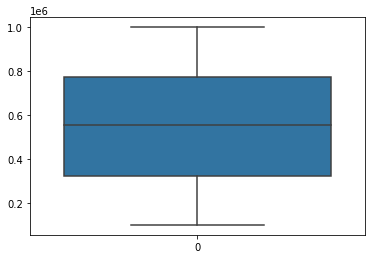

Subject


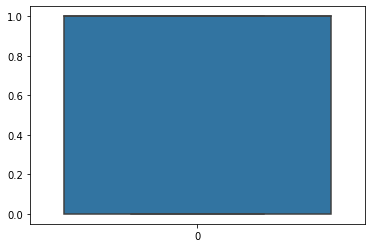

school


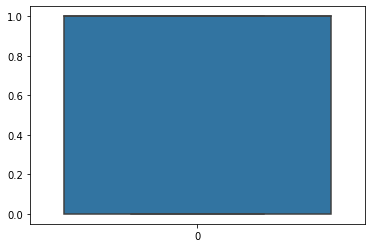

sex


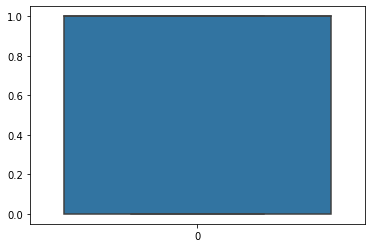

age


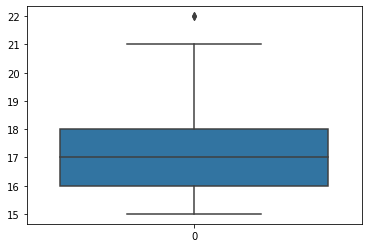

address


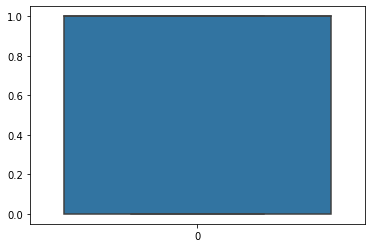

famsize


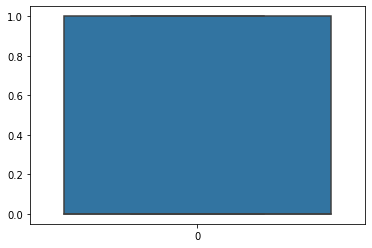

Pstatus


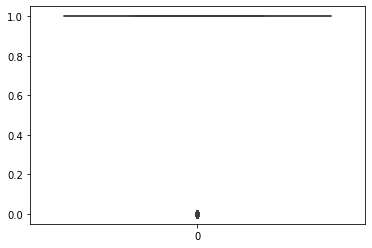

Medu


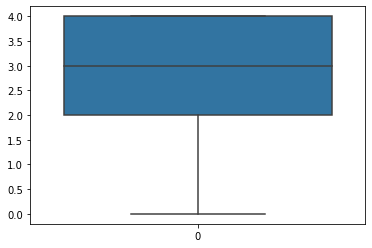

Fedu


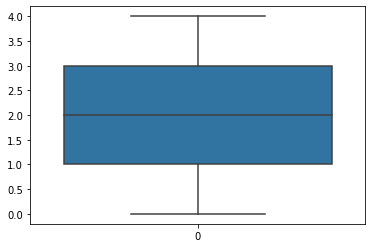

Mjob


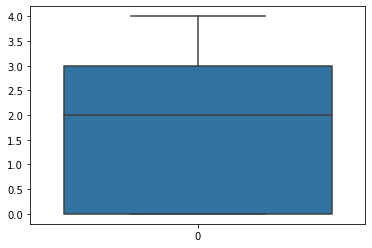

Fjob


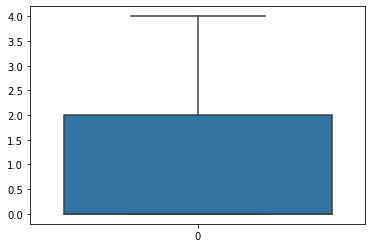

reason


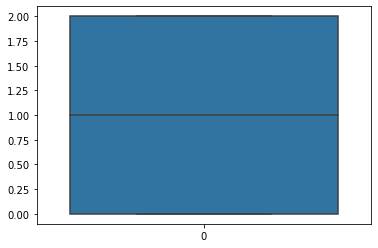

guardian


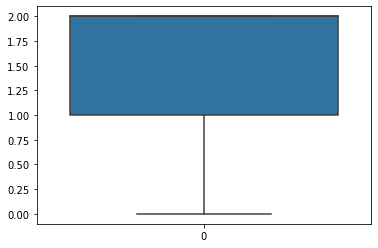

traveltime


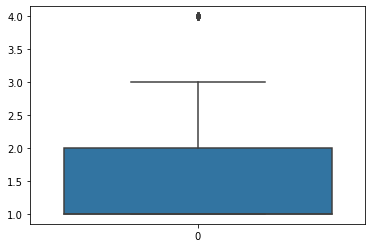

studytime


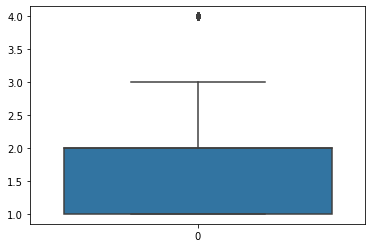

failures


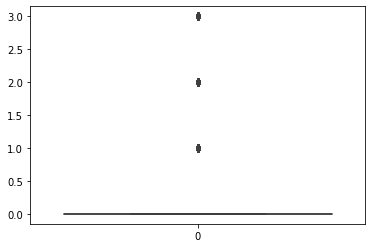

schoolsup


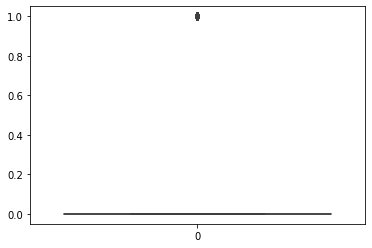

famsup


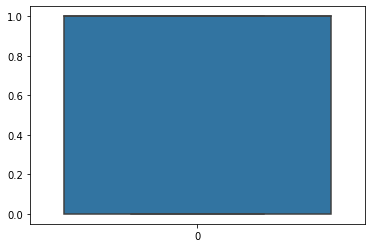

paid


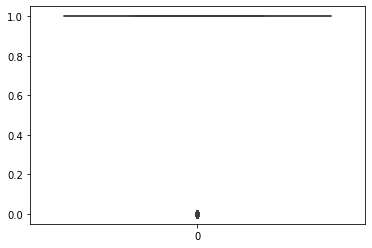

activities


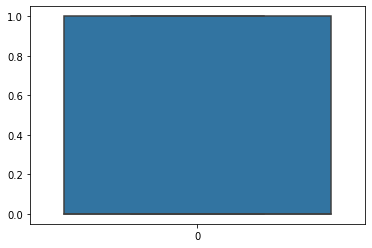

nursery


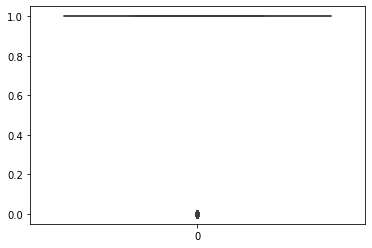

higher


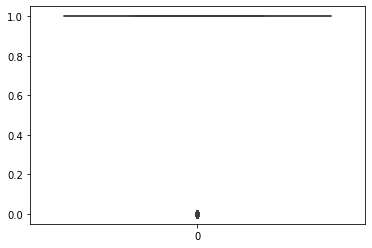

internet


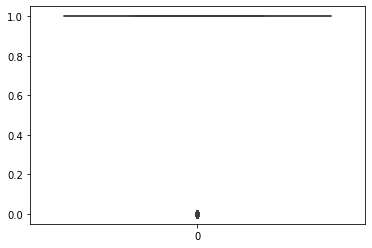

romantic


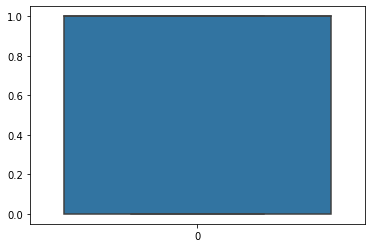

famrel


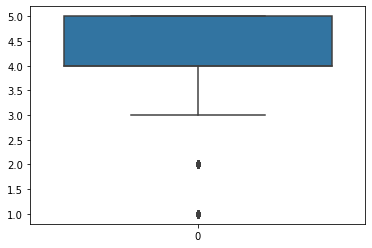

freetime


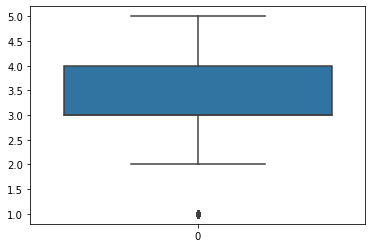

goout


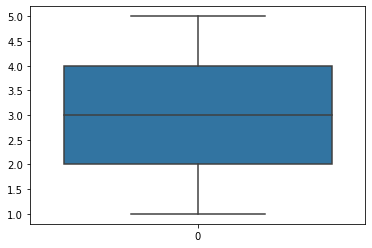

Dalc


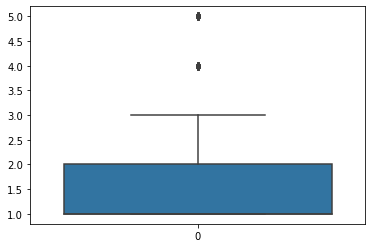

Walc


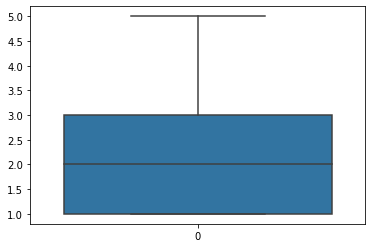

health


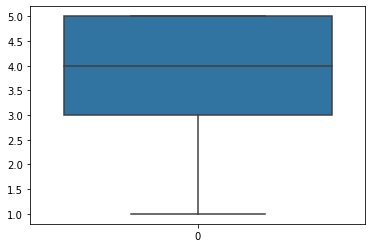

absences


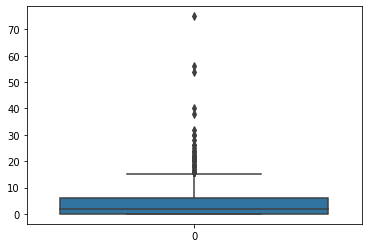

G1


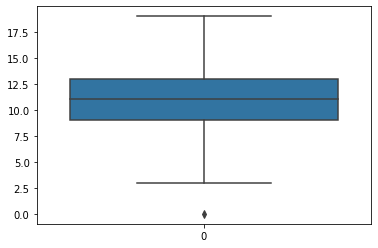

G2


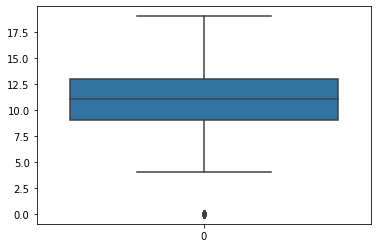

G3


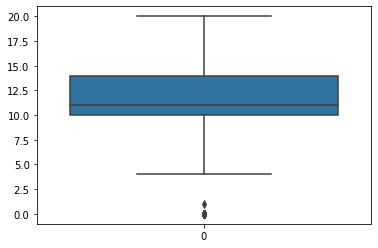

In [15]:
for i in data.columns.tolist():
  print(i)
  sns.boxplot(data=data[i])
  plt.show()

из интересных фактов, которые мы узнали по ящикам с усами: 
в школе учится студет которому 22, но это скорее второгодник, 
чем вброс данных
надо дропнуть айди

In [0]:
data.drop(['ID'], axis='columns', inplace=True)

### Нормализация данных
Именно нормализация, а не стандартизация, так как нам необходимо уменьшить расстояние, и отрицательные значения тут не к месту

сделаем нормализацию данных
тут я поняла что в некоторых других столбцах есть некоректные данные
так же объединим алкоголь в один столбец
и создадим столбец благополучия в семье  
так же оставим бинарным признакам их бинарность

In [0]:
def drop_bin(frame, norm):
  for seria in frame.columns.tolist():
    if (frame[seria].max() == 1) & (frame[seria].min() == 0):
      norm.drop([seria], axis='columns', inplace=True)

In [215]:
data_norm = pd.DataFrame(preprocessing.normalize(data), columns=list(data.columns))
#scaler = preprocessing.StandardScaler()
#scaler.fit(data)
#data_norm = pd.DataFrame(scaler.transform(data), columns=list(data.columns))

#data_norm['Alco'] = data_norm['Dalc'] + data_norm['Walc']
#data_norm.drop(['Dalc'], axis='columns', inplace=True)
#data_norm.drop(['Walc'], axis='columns', inplace=True)
data_norm.drop(['G2'], axis='columns', inplace=True)

#drop_bin(data, data_norm)

data_norm

,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G3
0,0.030275,0.030275,0.030275,0.484404,0.030275,0.000000,0.000000,0.090826,0.121101,0.060550,0.000000,0.060550,0.030275,0.030275,0.030275,0.000000,0.0,0.000000,0.030275,0.000000,0.030275,0.030275,0.030275,0.030275,0.090826,0.060550,0.030275,0.030275,0.121101,0.151376,0.363303,0.454129,0.423853
1,0.027735,0.027735,0.027735,0.471495,0.027735,0.000000,0.027735,0.083205,0.055470,0.000000,0.000000,0.055470,0.055470,0.027735,0.055470,0.000000,0.0,0.000000,0.027735,0.027735,0.000000,0.027735,0.027735,0.027735,0.138675,0.083205,0.110940,0.027735,0.083205,0.083205,0.055470,0.471495,0.471495
2,0.039133,0.039133,0.000000,0.626128,0.039133,0.039133,0.039133,0.039133,0.078266,0.039133,0.078266,0.078266,0.078266,0.078266,0.039133,0.078266,0.0,0.000000,0.039133,0.000000,0.000000,0.039133,0.039133,0.039133,0.156532,0.156532,0.195665,0.117399,0.195665,0.195665,0.000000,0.352197,0.391330
3,0.030585,0.000000,0.000000,0.519948,0.030585,0.000000,0.030585,0.061170,0.091756,0.000000,0.061170,0.000000,0.030585,0.061170,0.061170,0.000000,0.0,0.000000,0.030585,0.030585,0.030585,0.030585,0.030585,0.030585,0.122341,0.122341,0.091756,0.030585,0.030585,0.091756,0.122341,0.428193,0.489363
4,0.034442,0.034442,0.034442,0.551069,0.034442,0.000000,0.034442,0.034442,0.034442,0.103325,0.000000,0.000000,0.068884,0.068884,0.034442,0.000000,0.0,0.034442,0.034442,0.000000,0.034442,0.034442,0.000000,0.034442,0.137767,0.103325,0.068884,0.034442,0.137767,0.172209,0.068884,0.413302,0.447744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0.000000,0.038236,0.038236,0.573539,0.000000,0.000000,0.038236,0.114708,0.114708,0.076472,0.076472,0.038236,0.000000,0.076472,0.114708,0.076472,0.0,0.038236,0.000000,0.038236,0.038236,0.038236,0.038236,0.000000,0.152944,0.076472,0.038236,0.076472,0.114708,0.114708,0.305888,0.382360,0.382360
1040,0.040096,0.040096,0.000000,0.601445,0.000000,0.000000,0.040096,0.080193,0.040096,0.040096,0.080193,0.040096,0.080193,0.040096,0.080193,0.000000,0.0,0.000000,0.040096,0.040096,0.040096,0.040096,0.040096,0.000000,0.200482,0.160385,0.080193,0.040096,0.040096,0.200482,0.160385,0.400963,0.400963
1041,0.028820,0.000000,0.028820,0.461112,0.000000,0.028820,0.028820,0.028820,0.028820,0.086459,0.000000,0.057639,0.028820,0.086459,0.057639,0.000000,0.0,0.028820,0.028820,0.000000,0.028820,0.028820,0.000000,0.028820,0.144098,0.086459,0.057639,0.028820,0.028820,0.028820,0.000000,0.461112,0.518751
1042,0.040096,0.040096,0.000000,0.641542,0.040096,0.000000,0.040096,0.080193,0.040096,0.120289,0.000000,0.080193,0.080193,0.160385,0.040096,0.000000,0.0,0.000000,0.040096,0.000000,0.040096,0.040096,0.000000,0.040096,0.120289,0.080193,0.040096,0.040096,0.040096,0.080193,0.160385,0.360867,0.441060


### Корреляция

теперь посмотрим корреляцию наших данных


заменим малозначащие данные и данные между одинаковыми столбцами на один 
цвет, чтобы яркие зависимости были хорошо видны

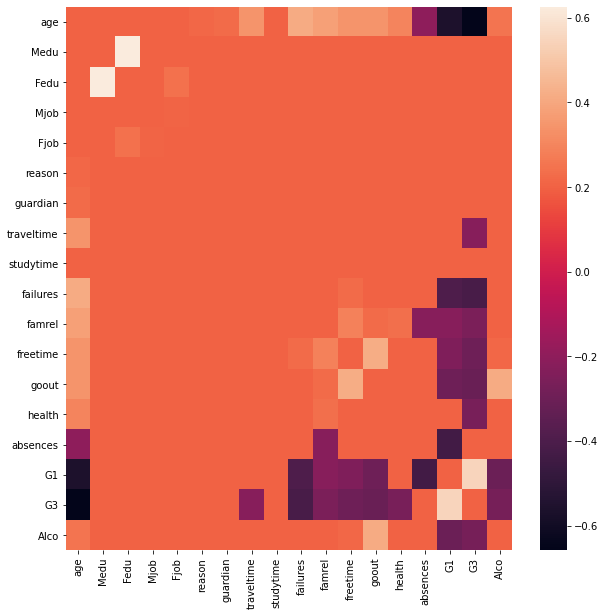

In [19]:
corr = data_norm.corr() 
fig, ax = plt.subplots(figsize=(10,10))    

for i in corr.columns.tolist():
  for j in corr.columns.tolist():
    if (-0.2 < corr[i][j] < 0.2) | (corr[i][j] == 1):
      corr[i][j] = 0.2
sns.heatmap(corr, xticklabels=corr.columns.values, 
           yticklabels=corr.columns.values)

# Часть 2. Регрессия

* Решите задачу регрессии: постройте модель, предсказывающую итоговую оценку, которую получит студент по предмету (`G3`). При решении задачи **нельзя** использовать признак `G2`.  
<br>  
* При решении задачи используйте различные методы, которые рассматривались на занятиях:  
  * Линейная регрессия + регуляризации;  
  * Полиномиальная регрессия;  
  * KNN и  Radius Neighbors;  
  * Деревья решений.  
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  
<br>    
* Оцените качество каждой модели, используйте различные метрики. Сравните модели и сделайте вывод о качестве решения задачи.  
<br>    
* Задачу необходимо решить в двух вариантах: с использованием признака `G1`  и без него. Сравните качество решений в двух случаях.  
<br>    
* В регрессионных моделях попробуйте дать интерпретацию весам признаков. 

1. Сравнить модели между собой
2. Дать интерпретацию весам признаков?

### Подготовка

Разделяем данные 

In [20]:
(trainD, testD, trainV, testV) = train_test_split(data_norm.drop('G3', axis=1),
                                            data_norm['G3'],
                                            test_size=0.3, 
                                            random_state=5)
(trainD1, testD1, trainV1, testV1) = train_test_split(data_norm.drop('G3', axis=1).drop('G1', axis=1),
                                            data_norm['G3'],
                                            test_size=0.3, 
                                            random_state=5)
trainD

,age,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,famrel,freetime,goout,health,absences,G1,Alco
842,0.693481,0.132092,0.132092,0.000000,0.000000,0.033023,0.000000,0.033023,0.099069,0.066046,0.099069,0.099069,0.066046,0.165115,0.000000,0.297206,0.066046
179,0.612223,0.076528,0.076528,0.000000,0.000000,0.076528,0.038264,0.038264,0.076528,0.000000,0.153056,0.114792,0.191320,0.153056,0.153056,0.382639,0.229584
880,0.500580,0.055620,0.055620,0.055620,0.000000,0.027810,0.055620,0.055620,0.055620,0.000000,0.111240,0.027810,0.111240,0.111240,0.278100,0.389340,0.111240
42,0.610257,0.033903,0.000000,0.101710,0.101710,0.067806,0.000000,0.101710,0.033903,0.033903,0.135613,0.101710,0.067806,0.135613,0.000000,0.406838,0.067806
540,0.543036,0.036202,0.036202,0.000000,0.000000,0.000000,0.036202,0.036202,0.072405,0.000000,0.144810,0.108607,0.072405,0.144810,0.072405,0.470632,0.181012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,0.531858,0.066482,0.066482,0.000000,0.099723,0.066482,0.033241,0.066482,0.066482,0.033241,0.132964,0.099723,0.099723,0.166206,0.465376,0.332411,0.132964
73,0.517477,0.097027,0.064685,0.000000,0.000000,0.032342,0.064685,0.032342,0.064685,0.000000,0.032342,0.064685,0.064685,0.032342,0.452792,0.388108,0.097027
998,0.466628,0.103695,0.103695,0.000000,0.000000,0.025924,0.051848,0.051848,0.077771,0.000000,0.129619,0.103695,0.103695,0.025924,0.000000,0.492552,0.051848
206,0.780013,0.045883,0.045883,0.137649,0.000000,0.091766,0.045883,0.045883,0.091766,0.000000,0.229416,0.137649,0.137649,0.137649,0.183533,0.229416,0.091766


напишем функцию считающую необходимые нам метрики 

In [0]:
def calc_metrics(true, pred):
    mse = metrics.mean_squared_error(true, pred)
    rmse = np.sqrt(mse)
    mae = metrics.mean_absolute_error(true, pred)
    medae = metrics.median_absolute_error(true, pred)
    R2 = metrics.r2_score(true, pred)
    print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse, rmse, R2, mae, medae))

Напишем функцию выполняющую визуализацию

In [0]:
def show_me(predictedV):
  sns.distplot(trainV, bins=100, hist=False, label='train')
  sns.distplot(testV, bins=100, hist=False, label='test')
  sns.distplot(predictedV, bins=100, hist=False, label='pred')
  plt.legend()
  plt.show()
def show_error(predictedV):
  error = testV - predictedV
  error = error.loc[error!=0]
  sns.distplot(error, bins=100, kde=False)
  plt.show()

## Линейная регрессия

Начнем с Гребневой регрессии

In [0]:
ridgeModel = linear_model.RidgeCV(alphas=np.arange(0, 100, 0.1), 
                                  cv=5,
                                  scoring='neg_mean_squared_error')
ridgeModel.fit(trainD, trainV)
predictedV = ridgeModel.predict(testD)

визуализируем предсказание

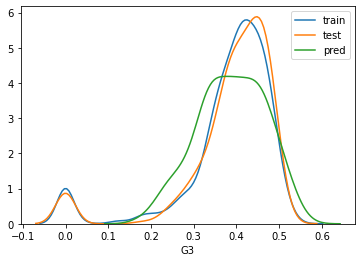

In [24]:
show_me(predictedV)

Визуализируем ошибку

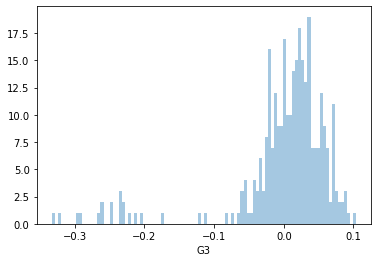

In [25]:
show_error(predictedV)

Выведем показатили тренировки и тестов

In [26]:
print('Testing')
calc_metrics(testV, predictedV)
print('Training')
calc_metrics(trainV, ridgeModel.predict(trainD))

Testing
MSE:   0.0051482951104008644
RMSE:  0.07175162096009305
R2:    0.5636864808223674
MAE:   0.04450525113517925
MedAE: 0.028894885541064008
Training
MSE:   0.005022924501513375
RMSE:  0.07087259344424596
R2:    0.5946200492536561
MAE:   0.04427692192673649
MedAE: 0.030183140247485446


Лассо регрессия

In [27]:
lassoModel = linear_model.Lasso(alpha=0)
lassoModel.fit(trainD, trainV)
predictedV = lassoModel.predict(testD)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8078956661725258, tolerance: 0.0009045180649299376
  positive)


Визуализируем предсказание

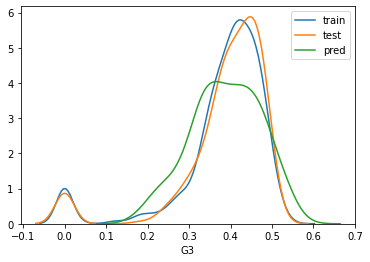

In [28]:
show_me(predictedV)

Визуализируем ошибку

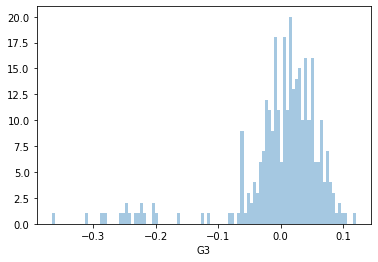

In [29]:
show_error(predictedV)

Выведем показатили тренировки и тестов

In [30]:
print('Testing')
calc_metrics(testV, predictedV)
print('Training')
calc_metrics(trainV, ridgeModel.predict(trainD))

Testing
MSE:   0.00514153834117471
RMSE:  0.07170452106509541
R2:    0.5642591111196048
MAE:   0.04583626031739055
MedAE: 0.03003458101492157
Training
MSE:   0.005022924501513375
RMSE:  0.07087259344424596
R2:    0.5946200492536561
MAE:   0.04427692192673649
MedAE: 0.030183140247485446


Выводы:
1. Обе регулиризации дали одинаковые результаты
2. линейный алгоритм плохо определяет 0 результаты
3. слишком равномерное предсказание
4. результаты плохие, нет смысла проверять без G1 (самого коррелирующего фактора для G3)

## Полиномиальная регрессия

Применим кросс валидацию для обнаружения лучшей степени 



Не будем брать слишком большую а то колаб ругается

In [31]:
rmses = []
degrees = np.arange(1, 6)
min_rmse, min_deg = 1e10, 0

for deg in degrees:

    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    d_poly_train = poly_features.fit_transform(trainD)

    poly_reg = linear_model.LinearRegression()
    poly_reg.fit(d_poly_train, trainV)

    # Compare with test data
    d_poly_test = poly_features.fit_transform(testD)
    poly_predict = poly_reg.predict(d_poly_test)
    poly_mse = mean_squared_error(testV, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)

    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg

# Plot and present results
print('Best degree {} with RMSE {}'.format(min_deg, min_rmse))


Best degree 2 with RMSE 0.04429528627154887


отразим результаты на графике

Text(0, 0.5, 'RMSE')

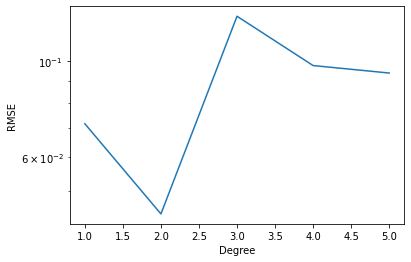

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')

Рассчитаем показатели для степени 5

In [33]:
poly_features = PolynomialFeatures(degree=5, include_bias=False)
d_poly_train = poly_features.fit_transform(trainD)

poly_reg = linear_model.LinearRegression()
poly_reg.fit(d_poly_train, trainV)

d_poly_test = poly_features.fit_transform(testD)
poly_predict = poly_reg.predict(d_poly_test)

print('Testing')
calc_metrics(testV, poly_predict)

Testing
MSE:   0.008839043631184533
RMSE:  0.09401618813366416
R2:    0.2508987635352403
MAE:   0.05746802355503614
MedAE: 0.035301905514955295


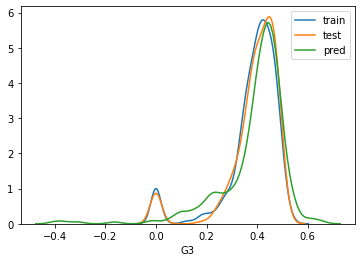

In [34]:
show_me(poly_predict)

И конечно же визуализируем ошибку

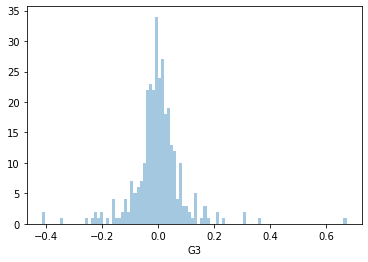

In [35]:
show_error(poly_predict)

Как мы видим, в целом данные предсказываются довольно неплохо, 
Так что здесь уже представляет интерес проверить, как будет работать алгоритм на тренеровочных данных без G1

In [0]:
poly_features = PolynomialFeatures(degree=5, include_bias=False)
d_poly_train = poly_features.fit_transform(trainD1)

poly_reg = linear_model.LinearRegression()
poly_reg.fit(d_poly_train, trainV1)

d_poly_test = poly_features.fit_transform(testD1)
poly_predict = poly_reg.predict(d_poly_test)


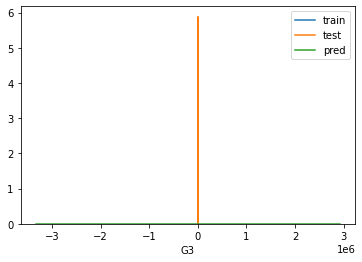

In [37]:
show_me(poly_predict)

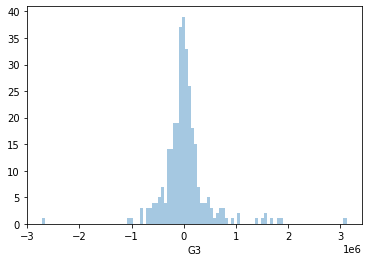

In [38]:
show_error(poly_predict)

In [39]:
print('Testing')
calc_metrics(testV1, poly_predict)

Testing
MSE:   204461007806.6179
RMSE:  452173.64784628694
R2:    -17327892037595.252
MAE:   263965.77363178146
MedAE: 149938.71710394733


Получили вполне ожидаемые результаты:
1. Полиномиальная регрессия большой степени предсказывает данные лучше, чем линейная
2. Мы взяли степень недостаточно большую, чтобы модель переучивалась 
3. При исключении признака G1, ошибка предсказания возрастает
4. Для Полиномиальной регрессии так же трудно определить кто завалил итоговый экзамен 

## К соседей

### С G1

Начнем кросс валидацию

In [40]:
knn2 = KNeighborsRegressor()

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn2, param_grid, cv=5,scoring='explained_variance')

knn_gscv.fit(trainD, trainV)
knn_gscv.best_params_

{'n_neighbors': 8}

вычислили лучшие параметры, теперь можно и посмотреть а что там с данными 

In [0]:
knn = KNeighborsRegressor(n_neighbors=8)
knn.fit(trainD, trainV)
predictedV = knn.predict(testD)

Визуализация!

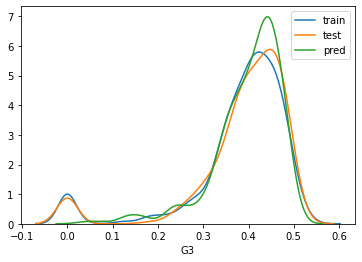

In [42]:
show_me(predictedV)

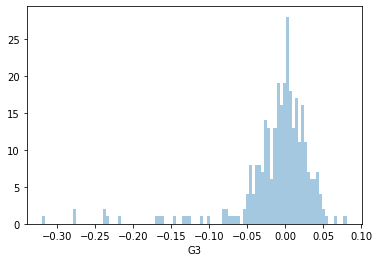

In [43]:
show_error(predictedV)

In [44]:
print('Testing')
calc_metrics(testV, predictedV)

Testing
MSE:   0.002753240422277652
RMSE:  0.05247132952649144
R2:    0.7666652761689611
MAE:   0.02976281857300427
MedAE: 0.01905919738891078


### Без G1

In [45]:
knn2 = KNeighborsRegressor()

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn2, param_grid, cv=5, scoring='explained_variance')

knn_gscv.fit(trainD1, trainV1)
knn_gscv.best_params_

{'n_neighbors': 6}

In [0]:
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(trainD1, trainV1)
predictedV = knn.predict(testD1)

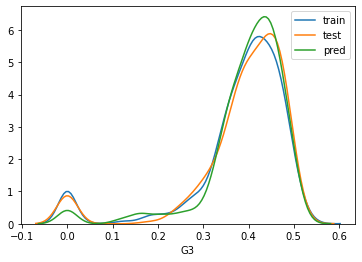

In [47]:
show_me(predictedV)

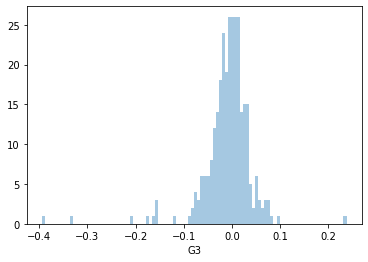

In [48]:
show_error(predictedV)

In [49]:
print('Testing')
calc_metrics(testV, predictedV)

Testing
MSE:   0.0026258355815493547
RMSE:  0.051242907621927104
R2:    0.7774627252713109
MAE:   0.030471764609700493
MedAE: 0.02039566852209518


## радиус

Кросс валидация

In [50]:
rnr = RadiusNeighborsRegressor()
param_grid = {'radius': np.arange(0.3,1.1, 0.01)}
rnr_gscv = GridSearchCV(rnr, param_grid, cv=5)
rnr_gscv.fit(trainD, trainV)
rnr_gscv.best_params_

{'radius': 0.3}

Предсказание

In [0]:
rnr = RadiusNeighborsRegressor(radius = rnr_gscv.best_params_['radius'])
rnr.fit(trainD, trainV)
predictedV = rnr.predict(testD)

Визуалия

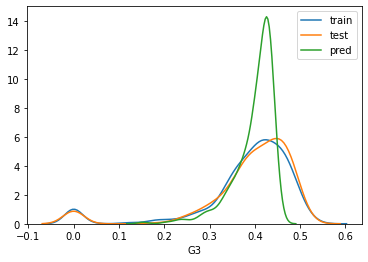

In [52]:
show_me(predictedV)

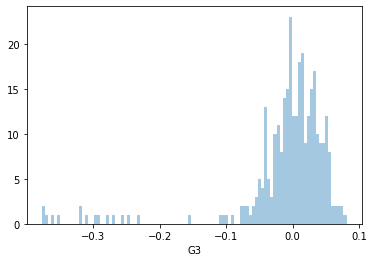

In [53]:
show_error(predictedV)

In [54]:
print('Testing')
calc_metrics(testV, predictedV)

Testing
MSE:   0.005933616162515881
RMSE:  0.07702996924909085
R2:    0.49713120677827627
MAE:   0.04170501565390141
MedAE: 0.02612221788506436


Как видно невооруженным глазом, метрика просто ужасно предсказала значения


Пробовать без G1 бессмысленно 

## деревья решений

### C G1

Кросс валидация

In [55]:
from sklearn.tree import DecisionTreeRegressor
reg_tree = DecisionTreeRegressor()

param_grid = {'max_depth': np.arange(1, 100)}

reg_tree_gscv = GridSearchCV(reg_tree, param_grid, cv=5)

reg_tree_gscv.fit(trainD, trainV)
reg_tree_gscv.best_params_

{'max_depth': 93}

Предсказание

In [0]:
reg_tree = DecisionTreeRegressor(max_depth = reg_tree_gscv.best_params_['max_depth'])
reg_tree.fit(trainD, trainV)
predictedV = reg_tree.predict(testD)

Визуал

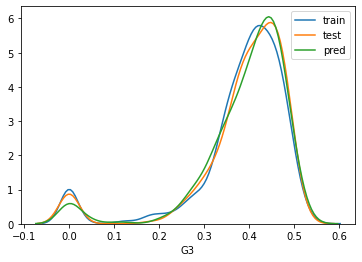

In [57]:
show_me(predictedV)

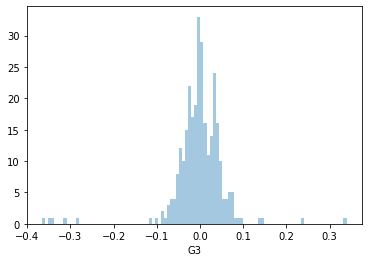

In [58]:
show_error(predictedV)

In [59]:
print('Testing')
calc_metrics(testV, predictedV)

Testing
MSE:   0.003611392704789482
RMSE:  0.060094864213087976
R2:    0.6939376188875003
MAE:   0.034198888453825
MedAE: 0.02494768246111176


### Без G1

In [60]:
from sklearn.tree import DecisionTreeRegressor
reg_tree = DecisionTreeRegressor()

param_grid = {'max_depth': np.arange(1, 100)}

reg_tree_gscv = GridSearchCV(reg_tree, param_grid, cv=5)

reg_tree_gscv.fit(trainD1, trainV1)
reg_tree_gscv.best_params_

{'max_depth': 57}

In [0]:
reg_tree = DecisionTreeRegressor(max_depth = reg_tree_gscv.best_params_['max_depth'])
reg_tree.fit(trainD1, trainV1)
predictedV = reg_tree.predict(testD1)

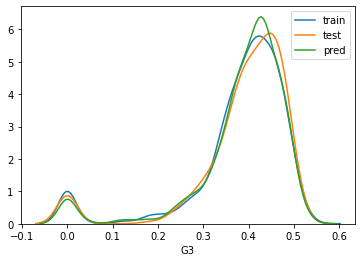

In [62]:
show_me(predictedV)

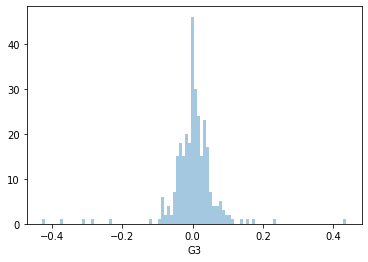

In [63]:
show_error(predictedV)

In [64]:
print('Testing')
calc_metrics(testV, predictedV)

Testing
MSE:   0.004160647988421889
RMSE:  0.06450308510778294
R2:    0.6473887127759576
MAE:   0.036072792171096095
MedAE: 0.02380180171051524


Выводы:
1. Как же хорошо Деревья Решений апроксимируют значения!!!
2. Конечно, камнем преткновения до сих пор остаются 0 
3. Результат без G1 конечно хуже, но совсем ненамного!!!

# Часть 3. Классификация

### Бинарная классификация
  
* Решите задачу бинарной классификации: постройте модель, предсказывающую, сдаст студент предмет (`G3` >= 8) или не сдаст (`G3` < 8). <br>При решении задачи **нельзя** использовать признаки `G1` и `G2`.  
  

* При решении задачи рассмотрите различные модели:  
  * KNN и  Radius Neighbors;  
  * Логистическая регрессия;  
  * Деревья решений.  
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  


* Оцените качество моделей, используйте различные подходы: confusion matrix и производные метрики, roc-кривая и roc auc. <br>Сделайте вывод о качестве решения задачи.  
  
  
* Постройте дерево решений глубины 5 (остальные параметры по умолчанию), оцените качество на 5-fold валидации.
  * Для одного из деревьев (т.е. обученного на одной из итераций кросс-валидации) выведите само дерево - постройте график или выведите в текстовом виде. По структуре дерева сформулируйте правила, по которым принимается решение.
  * Сравните между собой деревья решений, полученные на различных итерациях 5-fold валидации. Сделайте вывод, насколько сильно они похожи или различаются между собой. 


1. к каждой модели применить оценку
2. сделать вывод на основании всех оценок
3. сформулировать правило на основании которых принимается решение
4. сравнить деревья на различных итерациях 
5. сделать выводы

## Бинарная классификация

### Подготовка данных

In [0]:
def leave_bin(frame, norm):
  for seria in frame.columns.tolist():
    if (frame[seria].max() == 1) & (frame[seria].min() == 0):
      norm[seria] = frame[seria]

In [234]:
data_bin = data.copy()
data_bin.drop(['G1'], axis='columns', inplace=True)
data_bin.drop(['G2'], axis='columns', inplace=True)
data_bin.drop(['G3'], axis='columns', inplace=True)
data_bin['Pass'] = np.where((data['G3'] > 8),1,0)
#leave_bin(data, data_bin)
data_norm['is anybody home'] = np.where((data['Mjob'] == 3)|(data['Fjob'] == 3),1,0)
data_bin

,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Pass
0,1,1,1,16,1,0,0,3,4,2,0,2,1,1,1,0,0,0,1,0,1,1,1,1,3.0,2,1,1.0,4.0,5,12,1
1,1,1,1,17,1,0,1,3,2,0,0,2,2,1,2,0,0,0,1,1,0,1,1,1,5.0,3,4,1.0,3.0,3,2,1
2,1,1,0,16,1,1,1,1,2,1,2,2,2,2,1,2,0,0,1,0,0,1,1,1,4.0,4,5,3.0,5.0,5,0,1
3,1,0,0,17,1,0,1,2,3,0,2,0,1,2,2,0,0,0,1,1,1,1,1,1,4.0,4,3,1.0,1.0,3,4,1
4,1,1,1,16,1,0,1,1,1,3,0,0,2,2,1,0,0,1,1,0,1,1,0,1,4.0,3,2,1.0,4.0,5,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,1,1,15,0,0,1,3,3,2,2,1,0,2,3,2,0,1,0,1,1,1,1,0,4.0,2,1,2.0,3.0,3,8,1
1040,1,1,0,15,0,0,1,2,1,1,2,1,2,1,2,0,0,0,1,1,1,1,1,0,5.0,4,2,1.0,1.0,5,4,1
1041,1,0,1,16,0,1,1,1,1,3,0,2,1,3,2,0,0,1,1,0,1,1,0,1,5.0,3,2,1.0,1.0,1,0,1
1042,1,1,0,16,1,0,1,2,1,3,0,2,2,4,1,0,0,0,1,0,1,1,0,1,3.0,2,1,1.0,1.0,2,4,1


In [0]:
lab_enc = preprocessing.LabelEncoder()
data_bin['Pass']=lab_enc.fit_transform(data_bin['Pass'])

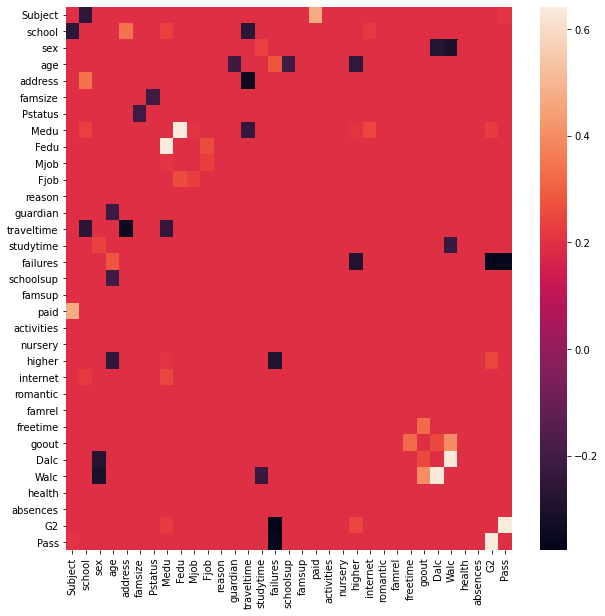

In [230]:
corr = data_bin.corr() 
fig, ax = plt.subplots(figsize=(10,10))    

for i in corr.columns.tolist():
  for j in corr.columns.tolist():
    if (-0.2 < corr[i][j] < 0.2) | (corr[i][j] == 1):
      corr[i][j] = 0.2
sns.heatmap(corr, xticklabels=corr.columns.values, 
           yticklabels=corr.columns.values)

In [0]:
(trainD, testD, trainV, testV) = train_test_split(data_bin.drop('Pass', axis=1),
                                            data_bin['Pass'],
                                            test_size=0.3, 
                                            random_state=5)

In [0]:
def show_class(data, cluster, x, y):
  sns.pairplot(x_vars=x, 
             y_vars=y, 
             hue=cluster,
             data=data, 
             size=6)
  plt.gca().set(xlabel=x, ylabel=y)
  plt.show()

### KNN 

Бежим кросс

In [121]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5,scoring='explained_variance')

knn_gscv.fit(trainD, trainV)
knn_gscv.best_params_

{'n_neighbors': 21}

Тренируем

In [0]:
knn = KNeighborsClassifier(n_neighbors=knn_gscv.best_params_['n_neighbors']-5)
knn.fit(trainD, trainV)
predictedV = knn.predict(testD)
testD['knn'] = predictedV

Визуализируем

### Radius Neighbors

Кроссим

In [72]:
from sklearn.neighbors import RadiusNeighborsClassifier
rnr = RadiusNeighborsClassifier()
param_grid = {'radius': np.arange(2.1,3.0, 0.01)}
rnr_gscv = GridSearchCV(rnr, param_grid, cv=5)
rnr_gscv.fit(trainD, trainV)
rnr_gscv.best_params_

{'radius': 2.1}

тестим

смотрим

### Логистическая регрессия

In [81]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(trainD,trainV)
predictedV = logistic.predict(testD)
predictedV

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

### Деревья решений

Валидация

In [82]:
from sklearn.tree import DecisionTreeClassifier
reg_tree = DecisionTreeClassifier()

param_grid = {'max_depth': np.arange(1, 100)}

reg_tree_gscv = GridSearchCV(reg_tree, param_grid, cv=5)

reg_tree_gscv.fit(trainD, trainV)
reg_tree_gscv.best_params_

{'max_depth': 90}

Тренировка

In [105]:
reg_tree = DecisionTreeClassifier(max_depth = reg_tree_gscv.best_params_['max_depth'])
reg_tree.fit(trainD, trainV)
predictedV = reg_tree.predict(testD)
predictedV

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

### Построение дерева

In [236]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
kf = KFold(n_splits=5, shuffle=True, random_state=1)
for train_index, test_index in kf.split(data_bin):
  X_train, X_test = data_bin.drop('Pass', axis=1).iloc[train_index], data_bin.drop('Pass', axis=1).iloc[test_index]
  y_train, y_test = data_bin['Pass'][train_index], data_bin['Pass'][test_index]
  reg_tree = DecisionTreeClassifier(max_depth=5)
  reg_tree.fit(X_train, y_train)
  predictedV = reg_tree.predict(X_test)
  print(predictedV)

[1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1
 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1


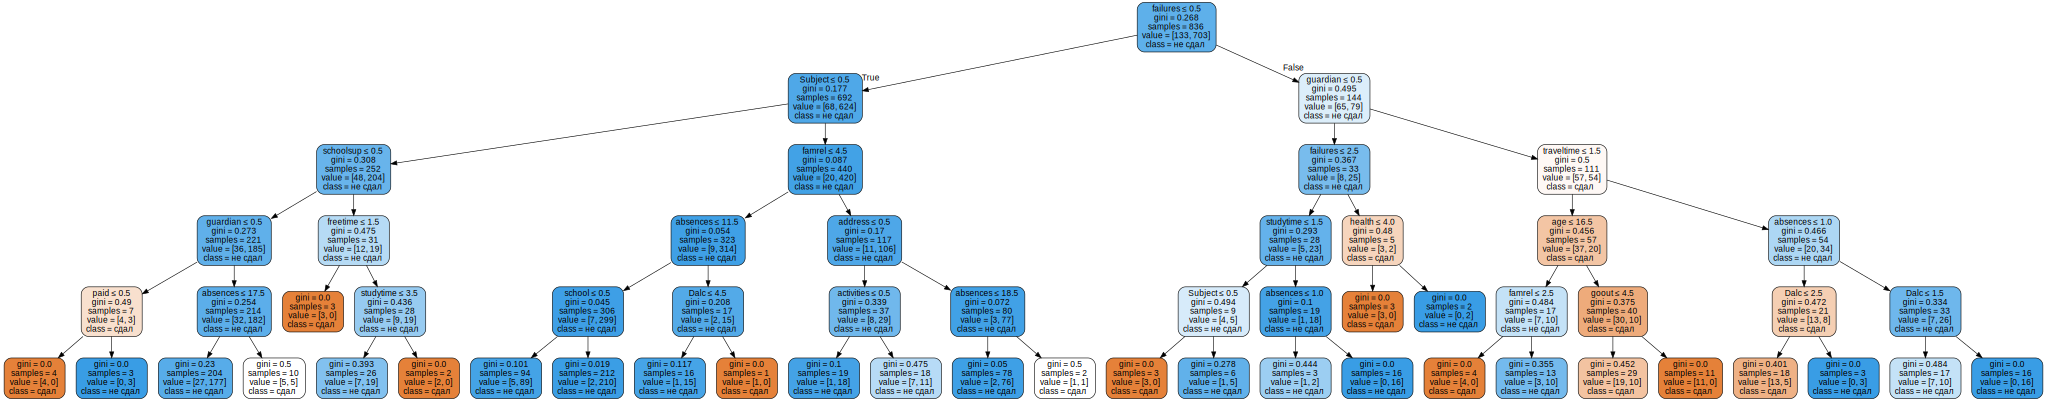

In [237]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(reg_tree, feature_names=list(trainD.columns), class_names=['сдал ','не сдал'],  
                  filled=True, rounded=True,  
                  special_characters=True,
                   out_file=None,)
graph = graphviz.Source(dot_data)
graph

age 
reason 
absences 
Medu 
failures 
guardian 
internet 
Fedu 

Walc 


## Многоклассовая классификация
  
* Решите задачу многоклассовой классификации: постройте модель, пресдказывающую оценку студента по предмету по 4 балльной шкале
    - Отлично: 18 <= `G3` <= 20
    - Хорошо: 14 <= `G3` <= 17
    - Удовлетворительно: 8 <= `G3` <= 13
    - Неудовлетворительно: `G3` < 8  
  
  При решении задачи **нельзя** использовать признаки `G1` и `G2`.  
  
  
* При решении задачи рассмотрите различные модели:  
  * KNN и  Radius Neighbors;  
  * Логистическая регрессия;  
  * Деревья решений.  
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  
  
  
* Оцените качество моделей, сделайте вывод.  
  

* На кросс-валидации оцените, как зависит качество прогноза Дерева решений от максимальной глубины дерева. Результаты провизуализируйте, дайте содержательный комментарий.  

1. оценить качества моделей
2. сделать выводы по моделям
3. оценить качество прогрноза от глубины дерева

### Подготовка данных

Создание датасета

In [0]:
def rule(g):
  if 18 <= g <= 20 :
    return 5
  elif 14 <= g <= 17:
    return 4
  elif 8 <= g <= 13:
    return 3
  else:
    return 2

In [0]:
data_mark = data_bin.copy()
data_mark.drop(['Pass'], axis='columns', inplace=True)
data_mark['Mark'] = data.apply(lambda x: rule(x['G3']), axis =  1)
data_mark['Mark'].describe()

Разделение данных

In [0]:
(trainD, testD, trainV, testV) = train_test_split(data_mark.drop('Mark', axis=1),
                                            data_mark['Mark'],
                                            test_size=0.3, 
                                            random_state=5)

In [0]:
#!pip install scikit-plot
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from scikitplot.metrics import plot_roc_curve

def print_ac(y_test, y_pred):
  print('\t\tconfusion_matrix')
  print(confusion_matrix(y_test, y_pred))
  print('\t\tclassification_report')
  print(classification_report(y_test, y_pred))
  print('\t\roc_auc_score')
  print(roc_auc_score(y_test, y_pred, average='micro', sample_weight=None, max_fpr=None))

def roc_cr(y_true, y_probas):
  metrics.plot_roc_curve(y_true, y_probas)
  plt.show()

### KNN 

Кросс

In [238]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5,scoring='explained_variance')

knn_gscv.fit(trainD, trainV)
knn_gscv.best_params_

{'n_neighbors': 19}

In [253]:
knn = KNeighborsClassifier(n_neighbors=knn_gscv.best_params_['n_neighbors'])
knn.fit(trainD, trainV)
predictedV = knn.predict(testD)
predictedV

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [255]:
print_ac(testV, predictedV)

		confusion_matrix
[[  1  45]
 [  0 268]]
		classification_report
              precision    recall  f1-score   support

           0       1.00      0.02      0.04        46
           1       0.86      1.00      0.92       268

    accuracy                           0.86       314
   macro avg       0.93      0.51      0.48       314
weighted avg       0.88      0.86      0.79       314



Предсказание

### Radius Neighbors

Кр кр кросс

In [128]:
from sklearn.neighbors import RadiusNeighborsClassifier
rnr = RadiusNeighborsClassifier()
param_grid = {'radius': np.arange(2.1,3.0, 0.01)}
rnr_gscv = GridSearchCV(rnr, param_grid, cv=5)
rnr_gscv.fit(trainD, trainV)
rnr_gscv.best_params_

{'radius': 2.1}

Магия

In [132]:
rnr = RadiusNeighborsClassifier(radius=rnr_gscv.best_params_['radius'])
rnr.fit(trainD, trainV)
predictedV = rnr.predict(testD)
predictedV

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

### Логистическая регрессия

In [133]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(trainD,trainV)
predictedV = logistic.predict(testD)
predictedV

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3,
       3, 3, 3, 4, 3, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 3, 3, 2, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4,
       4, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 4, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3,
       3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3,
       3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3,
       3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3,
       2, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 4, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 4, 3, 3, 3, 3,
       3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 4, 3,
       4, 4, 3, 4, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3,

### Деревья решений

In [134]:
from sklearn.tree import DecisionTreeClassifier
reg_tree = DecisionTreeClassifier()

param_grid = {'max_depth': np.arange(1, 100)}

reg_tree_gscv = GridSearchCV(reg_tree, param_grid, cv=5)

reg_tree_gscv.fit(trainD, trainV)
reg_tree_gscv.best_params_

{'max_depth': 3}

In [137]:
reg_tree = DecisionTreeClassifier(max_depth = reg_tree_gscv.best_params_['max_depth'])
reg_tree.fit(trainD, trainV)
predictedV = reg_tree.predict(testD)
data_mark.loc[data_mark['Mark'] == 2]

,age,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,famrel,freetime,goout,health,absences,Alco,is anybody home,Subject,school,sex,address,famsize,Pstatus,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,Mark
8,0.635001,0.127000,0.084667,0.084667,0.000000,0.042333,0.084667,0.042333,0.084667,0.000000,0.169334,0.169334,0.169334,0.211667,0.423334,0.084667,0,0,1,1,1,1,1,0,1,0,0,1,1,1,1,2
12,0.721155,0.160257,0.160257,0.160257,0.120192,0.040064,0.080128,0.120192,0.040064,0.000000,0.160257,0.160257,0.120192,0.200321,0.280449,0.160257,1,0,0,1,0,0,1,0,1,0,1,1,1,1,0,2
14,0.707798,0.088475,0.088475,0.132712,0.000000,0.088475,0.088475,0.044237,0.088475,0.000000,0.176950,0.132712,0.176950,0.088475,0.176950,0.132712,1,0,1,1,1,1,1,0,1,1,0,1,1,0,1,2
71,0.776035,0.172452,0.086226,0.000000,0.000000,0.000000,0.043113,0.086226,0.043113,0.043113,0.215565,0.172452,0.129339,0.129339,0.000000,0.301791,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,2
74,0.659728,0.038808,0.077615,0.000000,0.000000,0.077615,0.077615,0.038808,0.038808,0.000000,0.116423,0.194038,0.194038,0.038808,0.543305,0.155230,0,0,0,1,0,0,1,0,0,1,1,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,0.793946,0.088216,0.088216,0.000000,0.000000,0.000000,0.000000,0.044108,0.088216,0.000000,0.176432,0.132324,0.132324,0.088216,0.000000,0.088216,0,0,1,1,1,1,1,0,0,1,1,0,1,1,0,2
1022,0.812291,0.047782,0.047782,0.000000,0.095564,0.047782,0.095564,0.143346,0.047782,0.047782,0.238909,0.095564,0.047782,0.047782,0.000000,0.143346,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,2
1023,0.557048,0.034816,0.034816,0.000000,0.000000,0.000000,0.069631,0.069631,0.069631,0.000000,0.104447,0.139262,0.069631,0.174078,0.626680,0.069631,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,2
1026,0.843820,0.044412,0.044412,0.133235,0.088823,0.000000,0.044412,0.088823,0.044412,0.044412,0.222058,0.222058,0.222058,0.088823,0.000000,0.222058,1,1,0,1,1,0,1,0,0,1,0,1,0,0,1,2


## Notes  
  
* Для оценки качества моделей используйте соответствующие задаче метрики, которые рассматривались на занятиях. Для кросс-валидации выберите ту метрику, которая кажется вам наиболее подходящей и аргументируйте свой выбор.  
  
  
* __Tip:__ Возможно, будет полезно решать задачи и строить модели отдельно для каждого предмета, а не для целого датасета.  
  
  
* __Бонусное задание:__ Попробуйте применить другие модели для решения задачи регресии или классификации. Например, Random Forest.